In [1]:
#import libraries
#my functions
from homemade import new_stepwise #feature selection
from homemade import remove_features #part of the feature selection module
from homemade import confusion_matrix_lr #plots confusion matrix given a trigger
from homemade import save_confusionmatrix #saves the CM given a trigger
from homemade import order_correlation_matrix 
from homemade import model_threshold_finder #finds the optmum threshold of probability for the LR model
from homemade import draw_precision_recall 




#data manipulation
import pandas as pd
import numpy as np

#to plot stuff
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

#split training and testing
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#machine learning 
import statsmodels.api as sm
import xgboost as xgb

#model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
output_image = 'output/image/'
output_csv = 'output/csv/'

In [3]:
#loads data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
y = df['Class']
X = df[df.columns.difference(['Class'])]
X = pd.get_dummies(df, drop_first=True)

In [9]:
p = sum(y)/len(y)
len(y)

284807

In [10]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
#define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


p_test = sum(y_test)/len(y_test)
p_train = sum(y_train)/len(y_train)

print("Percentage of Fraud in the test set: "+"{:.3%} and s".format(p_test))
print("Percentage of Fraud in the train set: "+"{:.3%}".format(p_train))


Percentage of Fraud in the test set: 0.173% and s
Percentage of Fraud in the train set: 0.173%


In [24]:
print(len(y_train))
len(y)

142403


284807

In [25]:
from sklearn.ensemble import IsolationForest


In [31]:
rng = np.random.RandomState(42) # generates the seeds
clf = IsolationForest(max_samples=200, random_state=rng) #fixes number of partitions at 100

In [32]:
clf.fit(X_train) #model fit
y_pred_train = clf.predict(X_train) #find anomalies in the training set
y_pred_test = clf.predict(X_test) #find anomalies in the testing set
y_pred_train = np.where(y_pred_train > 0, 0, y_pred_train)
y_pred_train = np.where(y_pred_train < 0, 1, y_pred_train)

In [33]:
#Define parameters 
#for the list of thresholds what is the minimum value and in how many bins we want to break it
start = 0 #starts in 0
interval = 0.05 #breaks 0.05 at a time
threshold_list = np.arange(start, 1.000001, interval) #creates the range

isolation_title = 'Isolation Forest No Sampled'

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


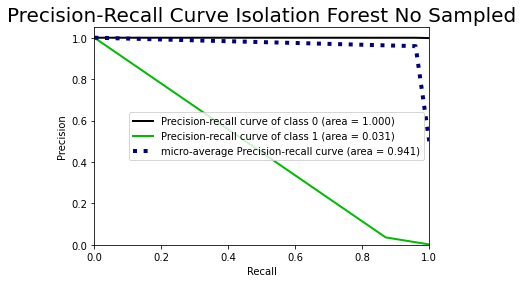

In [34]:
classification_1 = model_threshold_finder(start, interval, y_train, y_pred_train, isolation_title)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

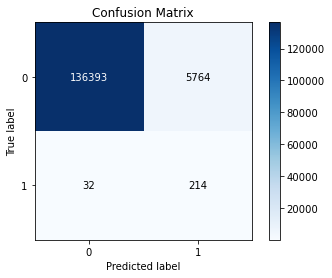

In [35]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

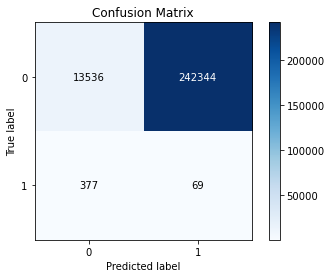

In [67]:
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train)
